In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Leando os dados

In [106]:
df = pd.read_csv('/workspaces/datagirls_aula1/Aula 2/music_genre.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


Verificando os nulos

In [107]:
df.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [108]:
faltantes = pd.DataFrame({'colunas': df.columns,
                          'tipo':df.dtypes,
                          'Qtde valores NaN': df.isna().sum(),
                          '% valores NaN': df.isna().sum()/df.shape[0]*100,
                           'valores únicos por feature' : df.nunique()})

faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,instance_id,instance_id,float64,5,0.009999,50000
1,artist_name,artist_name,object,5,0.009999,6863
2,track_name,track_name,object,5,0.009999,41699
3,popularity,popularity,float64,5,0.009999,99
4,acousticness,acousticness,float64,5,0.009999,4193
5,danceability,danceability,float64,5,0.009999,1088
6,duration_ms,duration_ms,float64,5,0.009999,26028
7,energy,energy,float64,5,0.009999,2085
8,instrumentalness,instrumentalness,float64,5,0.009999,5131
9,key,key,object,5,0.009999,12


In [109]:
df[df.artist_name.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df_cp = df.dropna()

In [111]:
df_cp.shape

(50000, 18)

In [112]:
df_preenchid = df.copy()

In [113]:

df_preenchid['artist_name'] = df_preenchid['artist_name'].fillna(df_preenchid['artist_name'].mode()[0])

In [114]:
df_preenchid[df_preenchid.artist_name.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


In [115]:

df_preenchid[df_preenchid.instance_id.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,empty_field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df_preenchid['acousticness'] = df_preenchid['acousticness'].fillna(df_preenchid['acousticness'].mean())

In [117]:
df_preenchid[df_preenchid.instance_id.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,empty_field,NaN,NaN,0.306383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ajustando o formato dos dados

In [118]:
df_preenchid.tempo.unique()

array(['100.889', '115.00200000000001', '127.994', ..., '112.97',
       '167.655', '99.20100000000001'], shape=(29395,), dtype=object)

In [119]:
df_preenchid.tempo = df_preenchid.tempo.astype(float)

ValueError: could not convert string to float: '?'

In [ ]:
df_preenchid.tempo = df_preenchid.tempo.replace({'?':np.nan})

In [ ]:
df_preenchid.tempo = df_preenchid.tempo.astype(float)

In [ ]:
df_preenchid['tempo'] = df_preenchid['tempo'].fillna(df_preenchid['tempo'].median())

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float64
 17

In [ ]:
df_preenchid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50005 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50005 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50005 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

Ajuste de musicas duplicadas

In [ ]:
df_cp[df_cp.track_name.duplicated()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
390,41528.0,Portishead,Only You,48.0,0.34400,0.572,299573.0,0.323,0.00742,F,0.1620,-12.335,Major,0.2230,118.10600000000001,4-Apr,0.104,Electronic
441,89702.0,Lookas,Eclipse,36.0,0.03770,0.515,193600.0,0.938,0.77000,A,0.1960,-3.823,Major,0.0481,150.059,4-Apr,0.357,Electronic
522,42537.0,Rusko,Everyday,27.0,0.00726,0.487,-1.0,0.972,0.26900,D#,0.1080,-6.259,Minor,0.0385,140.041,4-Apr,0.427,Electronic
577,87026.0,Valentino Khan,Hello,36.0,0.00410,0.526,198109.0,0.990,0.86400,G,0.0967,-1.441,Major,0.1050,127.912,4-Apr,0.416,Electronic
603,42401.0,Herobust,No Time,27.0,0.00554,0.609,188800.0,0.888,0.00544,B,0.7670,-1.692,Major,0.0639,150.043,4-Apr,0.354,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,37756.0,Lecrae,Cry For You,54.0,0.30400,0.642,263467.0,0.353,0.00000,A#,0.0927,-12.384,Minor,0.2150,89.596,4-Apr,0.276,Hip-Hop
49997,54580.0,Tee Grizzley,First Day Out,75.0,0.17100,0.587,254694.0,0.711,0.00000,C#,0.1250,-6.330,Major,0.4200,98.008,4-Apr,0.381,Hip-Hop
49998,64552.0,Logic,Growing Pains III,55.0,0.47400,0.514,246773.0,0.730,0.00000,E,0.5110,-8.491,Minor,0.3870,167.655,4-Apr,0.699,Hip-Hop
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.1190,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop


In [ ]:
df_cp[df_cp.track_name.duplicated(keep=False)].sort_values(by='track_name')

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
14829,77103.0,Lemon Jelly,'75 aka Stay With You,52.0,0.03070,0.712,371507.0,0.8270,0.795000,C#,0.122,-7.331,Major,0.0414,126.001,4-Apr,0.305,Jazz
4096,71962.0,Lemon Jelly,'75 aka Stay With You,51.0,0.03070,0.712,371507.0,0.8270,0.795000,C#,0.122,-7.331,Major,0.0414,126.001,4-Apr,0.305,Electronic
13660,29723.0,Jamiroquai,(Don't) Give Hate a Chance,48.0,0.01360,0.701,300227.0,0.8360,0.000081,D,0.197,-7.243,Major,0.0337,127.87100000000001,4-Apr,0.812,Jazz
4030,20598.0,empty_field,(Don't) Give Hate a Chance,48.0,0.01360,0.701,300227.0,0.8360,0.000081,D,0.197,-7.243,Major,0.0337,127.87100000000001,4-Apr,0.812,Electronic
31650,45147.0,Millie Jackson,(If Loving You Is Wrong) I Don't Want To Be Right,32.0,0.05590,0.519,237800.0,0.4580,0.000000,E,0.162,-11.702,Minor,0.0585,131.697,4-Apr,0.328,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42701,62460.0,Joe Hisaishi,海の見える街 - スーパー・サウンド・コレクション Vol.2 魔女の宅急便組曲,38.0,0.96700,0.595,170827.0,0.2610,0.890000,E,0.353,-10.725,Minor,0.0258,?,4-Apr,0.479,Classical
8331,36885.0,Nobuyuki Tsujii,花水木の咲く頃 - 辻井伸行,28.0,0.99400,0.270,209600.0,0.0171,0.921000,E,0.145,-31.429,Major,0.0410,70.931,4-Apr,0.147,Anime
42383,24851.0,Nobuyuki Tsujii,花水木の咲く頃 - 辻井伸行,31.0,0.99400,0.270,209600.0,0.0171,0.921000,E,0.145,-31.429,Major,0.0410,70.931,4-Apr,0.147,Classical
6249,80108.0,GReeeeN,道,29.0,0.24600,0.616,246453.0,0.9070,0.000000,A#,0.196,-4.650,Major,0.0387,94.97,4-Apr,0.572,Anime


In [ ]:
df_cp_tratado = df_cp.drop_duplicates(subset=['artist_name', 'track_name'], keep = 'first')

In [ ]:
df_preenchid_tratado = df_preenchid.drop_duplicates(subset=['artist_name', 'track_name'], keep = 'first')

Outliers

<Axes: xlabel='speechiness', ylabel='Count'>

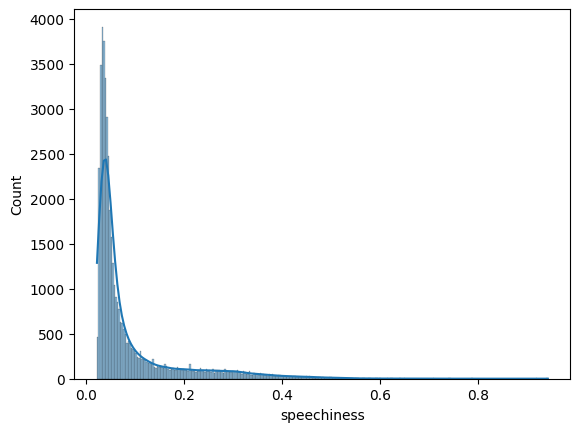

In [120]:
sns.histplot(data=df_cp_tratado, x="speechiness",kde=True)

<Axes: xlabel='speechiness', ylabel='Count'>

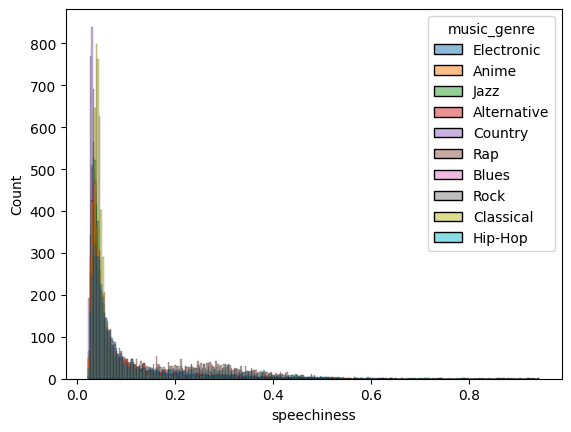

In [121]:
sns.histplot(data=df_cp_tratado, x="speechiness", hue="music_genre")